# **Imports**

In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report , accuracy_score,f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.dummy import DummyClassifier

In [4]:
df = pd.read_csv(r'data\framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4238, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# # **Data Preprocessing**

# **Calculate missing values**

In [8]:
df.drop(columns = 'education', inplace = True)

In [9]:
df.isnull().sum().sort_values(ascending = False)

glucose            388
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [10]:
#filled missing values in 'cigsPerDay' column with 0
df['cigsPerDay'].fillna(value=0.0,inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_11072\1715309715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(value=0.0,inplace=True)


 >  **we will fill other null values in the pipeline**

# **Data distribution**

**Plot the distribution for all features.**

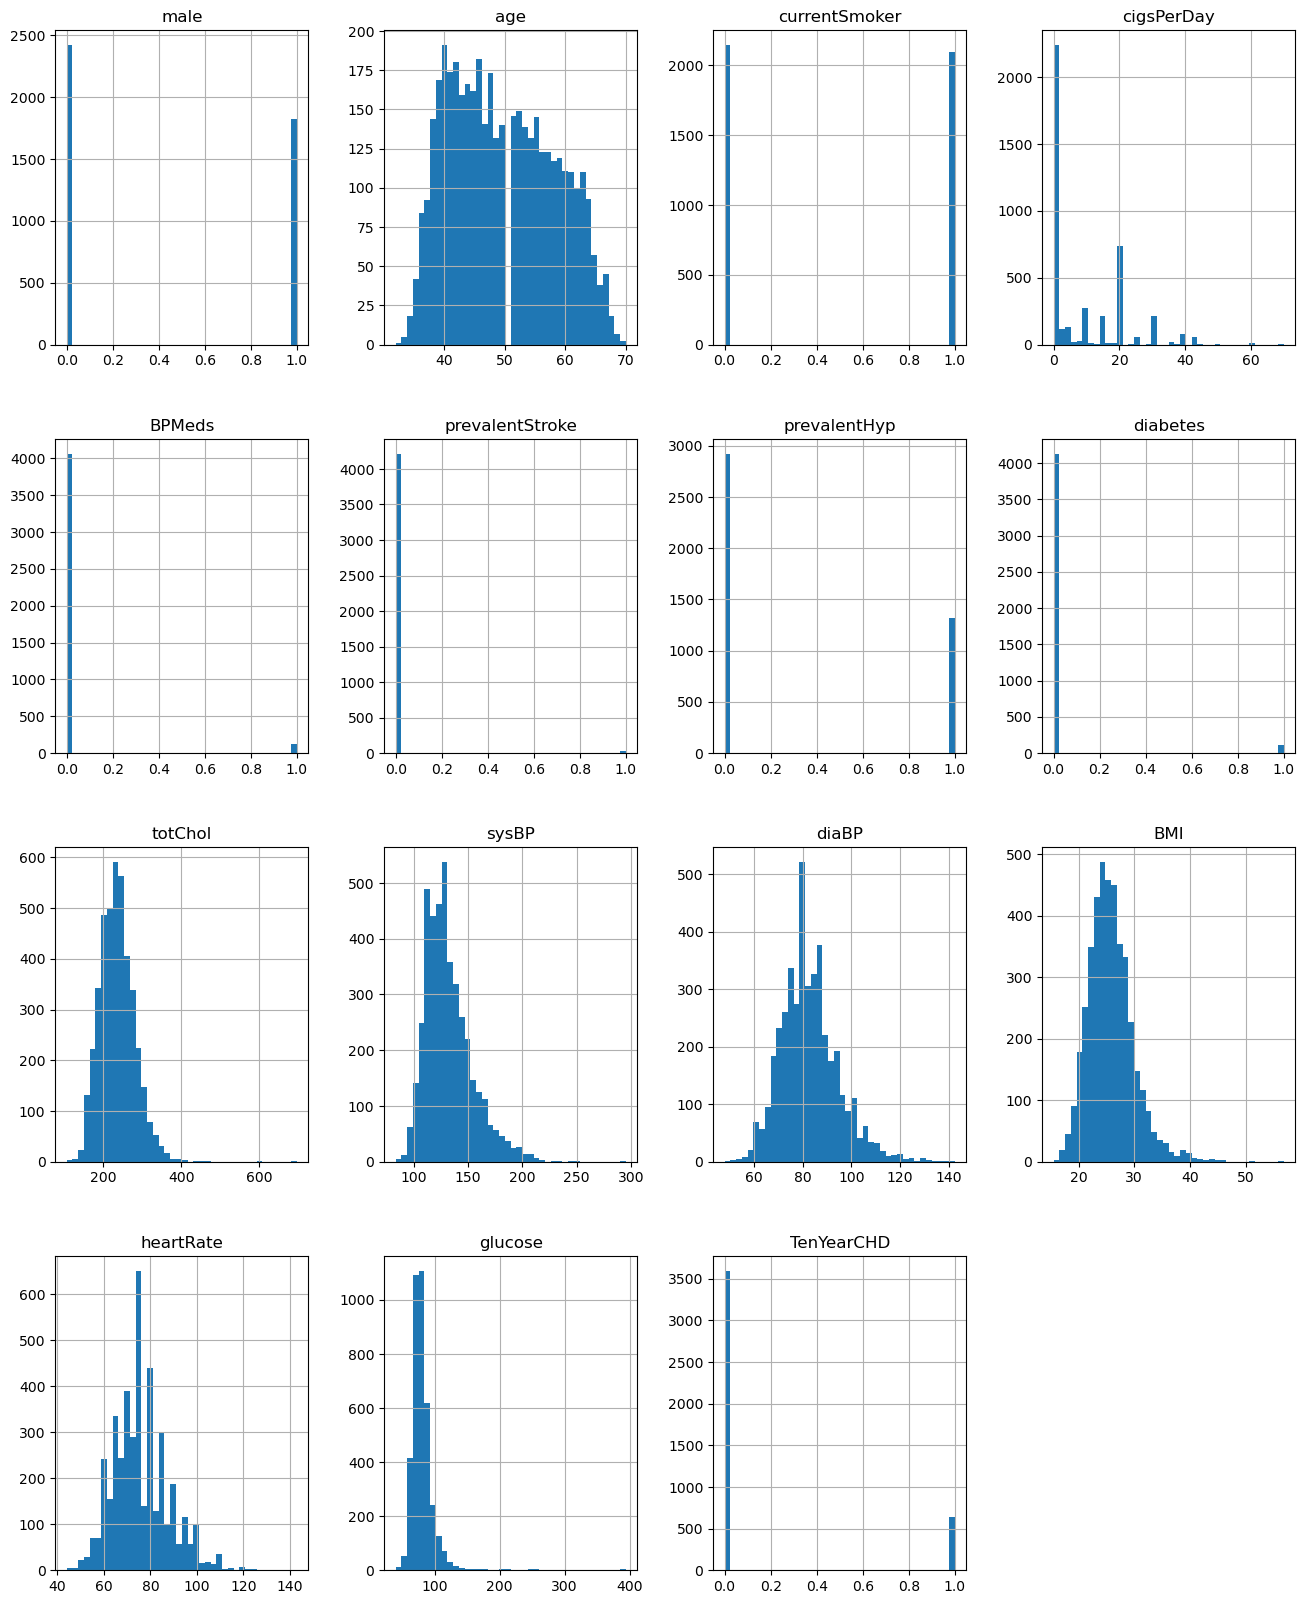

In [11]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=10, ylabelsize=10);


# **Outliers**

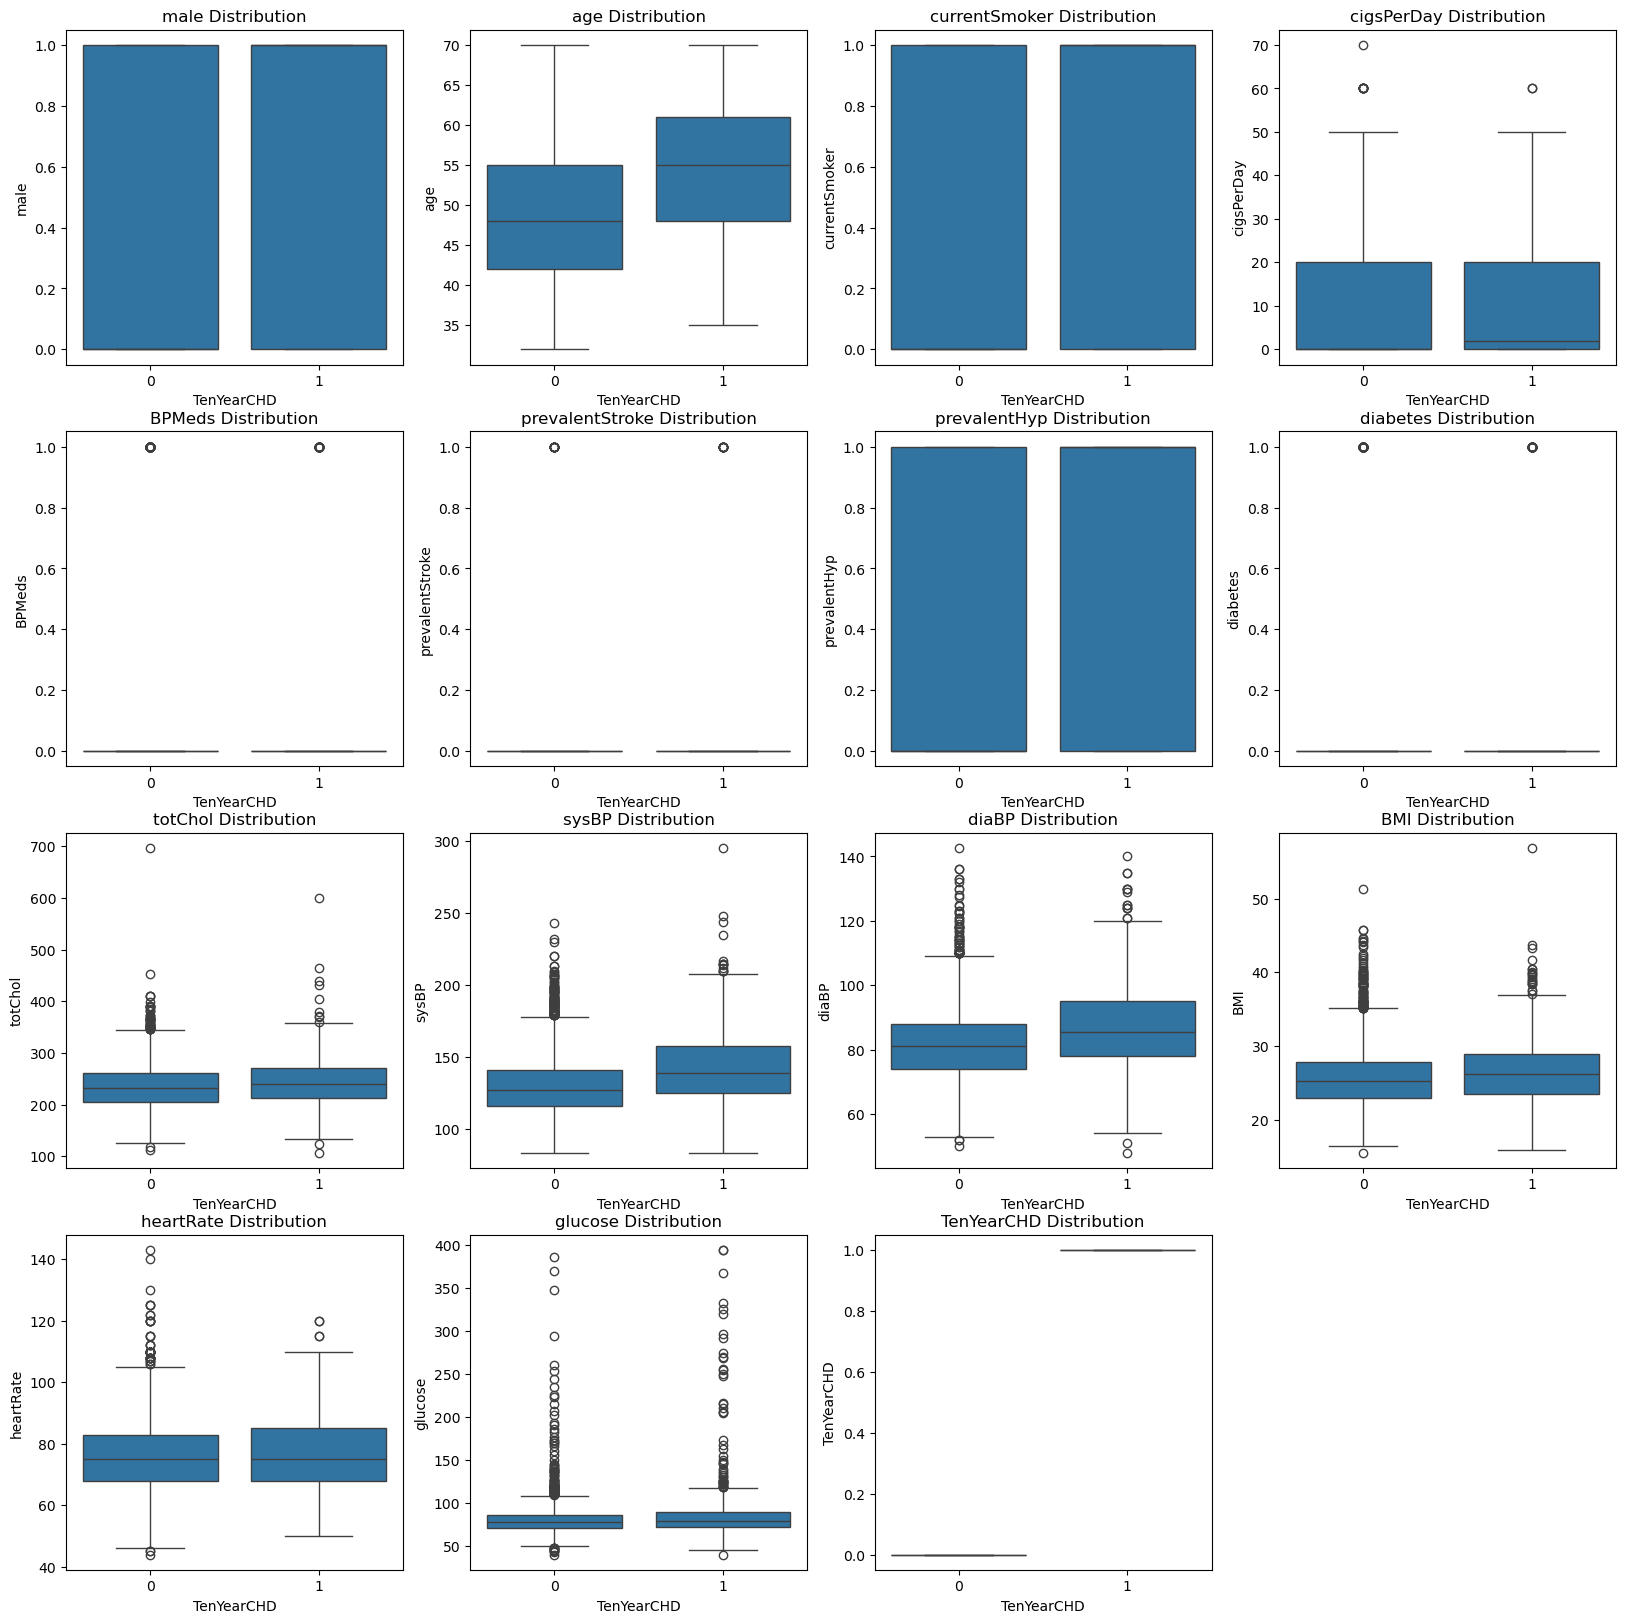

In [12]:
plt.figure(figsize=(20,20))
for idx,column in enumerate(df):
    plt.subplot(4,4,idx+1)
    sns.boxplot(x='TenYearCHD' , y= column , data=df)
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
plt.show()

**There is not a lot of outliers**

# **Multicollinearity**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
mask = (corr < 0.5) & (corr > -0.5)


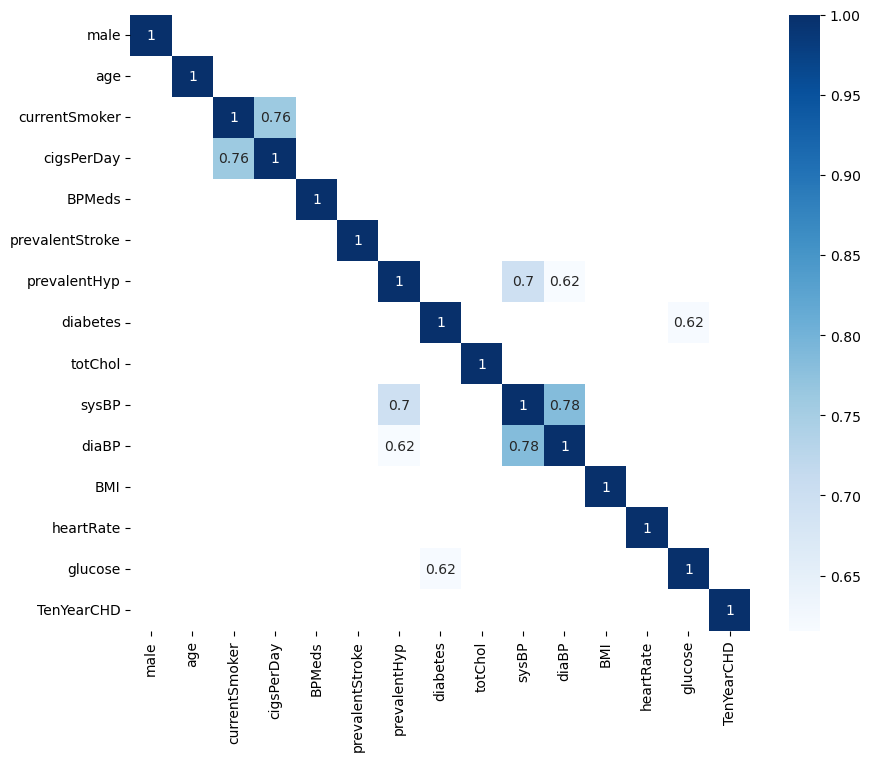

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', mask=mask)
plt.show()


# **Splitting data for train and test**

In [15]:
X = df.drop(columns=['TenYearCHD'])
target = df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 14)
y_train shape: (3390,)
X_test shape: (848, 14)
y_test shape: (848,)


# **Baseline**

- Sets Performance Expectations: Baseline models provide a clear benchmark, helping businesses set realistic goals for advanced models.
- Evaluates Model Value: By comparing complex models against a baseline, businesses can decide if added complexity is truly beneficial.
- Guides Model Development: Baseline models reveal initial data insights and feature relationships, helping inform further model design decisions.

In [16]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [17]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8538


In [18]:
accuracy = f1_score(y_test, y_pred)
print(f"Baseline Model f1 score: {accuracy:.4f}")

Baseline Model f1 score: 0.0000


# **Logistic regression model**

In [19]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8540
Testing accuracy :  0.8573


# **Confusion matrix**

In [21]:
cm=confusion_matrix(y_test,y_pred)

In [22]:
#        Predicted
#           0     1
# Actual  --------------
#    0  |  TN   |  FP  |
#       |--------|------|
#    1  |  FN   |  TP  |
#       |--------|------|

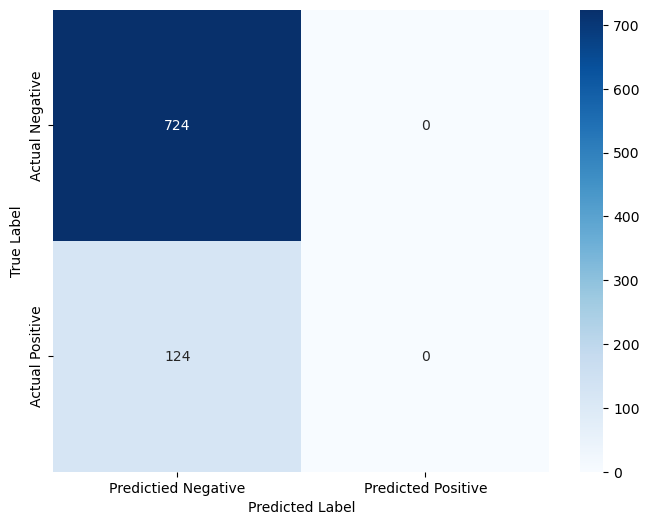

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=["Predictied Negative","Predicted Positive"],
            yticklabels=["Actual Negative","Actual Positive"],fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
print(classification_report(y_test , LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



# AUC-ROC curve

In [30]:
y_prob = LR_model.predict_proba(X_test)[:, 1]
y_prob

array([0.33866262, 0.08075313, 0.09680282, 0.16264253, 0.06317299,
       0.18856242, 0.08002937, 0.17200441, 0.18929724, 0.39479483,
       0.24503813, 0.24746991, 0.04671   , 0.12298323, 0.2232633 ,
       0.08311394, 0.29271318, 0.12295214, 0.29234317, 0.24120952,
       0.33061313, 0.03516114, 0.07625633, 0.0264458 , 0.15000149,
       0.17083573, 0.08049558, 0.12174624, 0.12550813, 0.06728183,
       0.34018403, 0.09794372, 0.09318559, 0.08529566, 0.06211959,
       0.04012999, 0.08946512, 0.04184178, 0.12935272, 0.08042774,
       0.31777634, 0.11594815, 0.17223264, 0.19382895, 0.05513555,
       0.05002179, 0.16102149, 0.03431183, 0.09911819, 0.22620439,
       0.04403829, 0.38753698, 0.21672355, 0.126999  , 0.0424491 ,
       0.10418124, 0.34357485, 0.12553695, 0.04762253, 0.03379805,
       0.09881701, 0.120565  , 0.20695386, 0.04656147, 0.16903401,
       0.04025525, 0.25561453, 0.13550005, 0.15753486, 0.12828222,
       0.11760509, 0.04537805, 0.08724396, 0.22068552, 0.07001

In [27]:
0.66133738+0.33866262

1.0

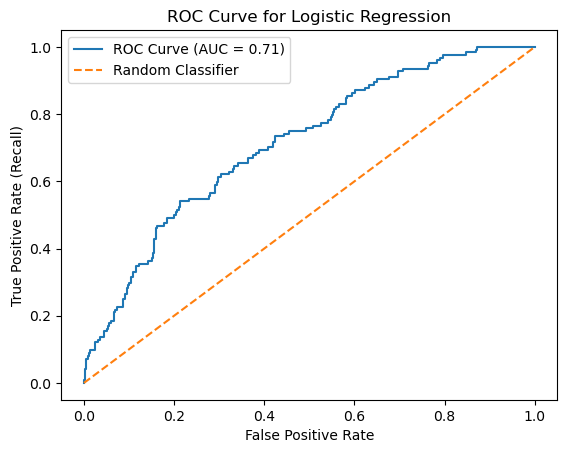

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))

plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()


In [33]:
list(zip(fpr, tpr, thresholds))

[(0.0, 0.0, inf),
 (0.0, 0.008064516129032258, 0.8458709789281165),
 (0.0013812154696132596, 0.008064516129032258, 0.7666692582148206),
 (0.0013812154696132596, 0.016129032258064516, 0.6840307840011739),
 (0.0027624309392265192, 0.016129032258064516, 0.5994413271832569),
 (0.0027624309392265192, 0.04032258064516129, 0.551097772525823),
 (0.004143646408839779, 0.04032258064516129, 0.5465367829000524),
 (0.004143646408839779, 0.04838709677419355, 0.5449928348256302),
 (0.0055248618784530384, 0.04838709677419355, 0.5339191572334306),
 (0.0055248618784530384, 0.07258064516129033, 0.5057625617758067),
 (0.008287292817679558, 0.07258064516129033, 0.5045347356558063),
 (0.008287292817679558, 0.08064516129032258, 0.48326656978177657),
 (0.011049723756906077, 0.08064516129032258, 0.46387302636780087),
 (0.011049723756906077, 0.08870967741935484, 0.44819515474439153),
 (0.013812154696132596, 0.08870967741935484, 0.44392910226065596),
 (0.013812154696132596, 0.0967741935483871, 0.442577220375653)

In [34]:
# Print FPR, TPR, and Thresholds
for f, t, thr in zip(fpr, tpr, thresholds):
    print(f"Threshold: {thr:.2f}, FPR: {f:.2f}, TPR: {t:.2f}")


Threshold: inf, FPR: 0.00, TPR: 0.00
Threshold: 0.85, FPR: 0.00, TPR: 0.01
Threshold: 0.77, FPR: 0.00, TPR: 0.01
Threshold: 0.68, FPR: 0.00, TPR: 0.02
Threshold: 0.60, FPR: 0.00, TPR: 0.02
Threshold: 0.55, FPR: 0.00, TPR: 0.04
Threshold: 0.55, FPR: 0.00, TPR: 0.04
Threshold: 0.54, FPR: 0.00, TPR: 0.05
Threshold: 0.53, FPR: 0.01, TPR: 0.05
Threshold: 0.51, FPR: 0.01, TPR: 0.07
Threshold: 0.50, FPR: 0.01, TPR: 0.07
Threshold: 0.48, FPR: 0.01, TPR: 0.08
Threshold: 0.46, FPR: 0.01, TPR: 0.08
Threshold: 0.45, FPR: 0.01, TPR: 0.09
Threshold: 0.44, FPR: 0.01, TPR: 0.09
Threshold: 0.44, FPR: 0.01, TPR: 0.10
Threshold: 0.41, FPR: 0.02, TPR: 0.10
Threshold: 0.39, FPR: 0.02, TPR: 0.12
Threshold: 0.38, FPR: 0.03, TPR: 0.12
Threshold: 0.38, FPR: 0.03, TPR: 0.13
Threshold: 0.37, FPR: 0.03, TPR: 0.13
Threshold: 0.37, FPR: 0.03, TPR: 0.14
Threshold: 0.36, FPR: 0.04, TPR: 0.14
Threshold: 0.36, FPR: 0.04, TPR: 0.15
Threshold: 0.34, FPR: 0.05, TPR: 0.15
Threshold: 0.34, FPR: 0.05, TPR: 0.16
Threshold: 0.

In [35]:
thresholds

array([       inf, 0.84587098, 0.76666926, 0.68403078, 0.59944133,
       0.55109777, 0.54653678, 0.54499283, 0.53391916, 0.50576256,
       0.50453474, 0.48326657, 0.46387303, 0.44819515, 0.4439291 ,
       0.44257722, 0.40694025, 0.39479483, 0.3777023 , 0.37654504,
       0.37126737, 0.36850954, 0.35722516, 0.35609757, 0.33955413,
       0.33916513, 0.33866262, 0.33843562, 0.33334225, 0.33326771,
       0.33061313, 0.32914745, 0.32725834, 0.32410642, 0.32286022,
       0.32241205, 0.32171413, 0.32005386, 0.30746249, 0.30391035,
       0.30065599, 0.29677609, 0.29582395, 0.29271318, 0.29234317,
       0.29120303, 0.28384283, 0.27937616, 0.27768024, 0.27631292,
       0.27588993, 0.27558588, 0.27434593, 0.27256847, 0.26919921,
       0.2680295 , 0.26398505, 0.26133707, 0.2541304 , 0.25229212,
       0.24746991, 0.24740435, 0.24503813, 0.24120952, 0.2401265 ,
       0.23685445, 0.23585869, 0.23503187, 0.23488784, 0.23479277,
       0.23380611, 0.23373365, 0.22620439, 0.22556965, 0.22297

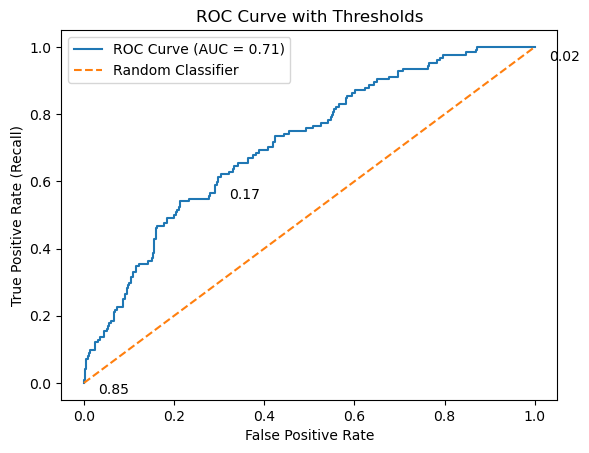

In [36]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr,label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve with Thresholds")

threshold_idx = [1, len(thresholds) // 2, -1]  # start, middle, end
for idx in threshold_idx:
    plt.annotate(f"{thresholds[idx]:.2f}", (fpr[idx], tpr[idx]), textcoords="offset points", xytext=(10,-10))

plt.legend()
plt.show()


In [46]:
y_prob = LR_model.predict_proba(X_test)[:, 1]  # Only need probabilities for the positive class
threshold = 0.2
y_pred_custom = (y_prob >= threshold).astype(int)
y_pred_custom

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.75
Precision: 0.30180180180180183
Recall: 0.5403225806451613
F1 Score: 0.3872832369942196


In [48]:
print(classification_report(y_test , y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.79      0.84       724
           1       0.30      0.54      0.39       124

    accuracy                           0.75       848
   macro avg       0.61      0.66      0.62       848
weighted avg       0.82      0.75      0.78       848



In [ ]:
import pickle

# Assuming your pipeline is stored in LR_model
pickle.dump(LR_model,open('model_LogisticRegression.pkl','wb'))